# Convolutional Neural Network (CNN)
- ฝึกทำ CNN

เอกสารประกอบ<br>
-https://www.tensorflow.org/tutorials/images/cnn<br>
-https://www.kaggle.com/datasets/alessiosanna/cat-dog-64x64-pixel

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
class_names = ['cat', 'dog']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
import os
from tqdm import tqdm
import cv2  
import numpy as np

def load_data():
    """
        Load the data:
    """
    
    datasets = ['images']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            if('.DS_Store' in folder):
                continue
                
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):    
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        #images = np.array(images, dtype = 'float32')
        images = np.array(images, dtype = 'int')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append([images, labels])

    return output

In [4]:
output = load_data()

100%|██████████| 55/55 [00:00<00:00, 631.93it/s]

Loading images


In [5]:
data,label = output[0]

In [107]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(data, label, random_state=22)

In [108]:
def preview_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

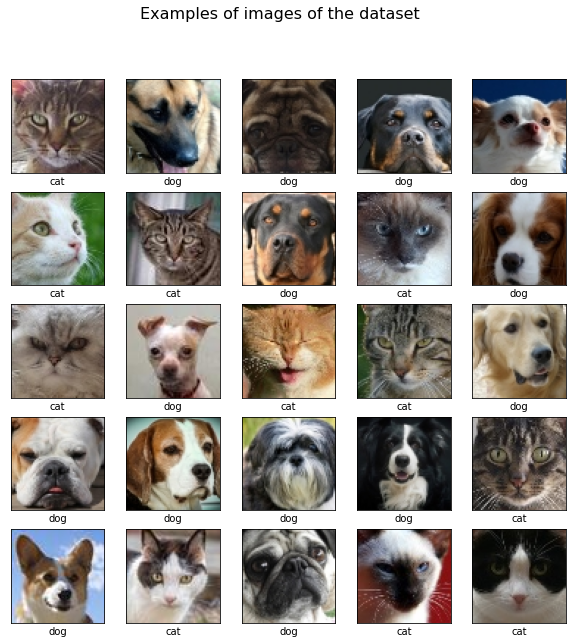

In [109]:
preview_examples(class_names,train_images,train_labels)

In [224]:
# สร้าง model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [225]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [238]:
from sklearn.model_selection import train_test_split

train_imagesNorm =  train_images/ 255

X_train, X_test, y_train, y_test = train_test_split(train_imagesNorm,train_labels,
                                                    test_size=0.3,random_state=50)

In [239]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split = 0.2)

Epoch 1/100
1/1 [==============================] - 0s 365ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.9809 - val_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 299ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2317 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 289ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.3657 - val_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 288ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.3093 - val_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 298ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.1191 - val_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 316ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.9691 - val_accuracy: 0.8125
Epoch 7/100
1/1 [==============================] - 1s 626ms/step - loss: 9.6937e-04 - accuracy: 1.0000 - val_loss: 0.8616 - val_accuracy: 0.7500
Epoch 8/1

1/1 [==============================] - 0s 332ms/step - loss: 1.9486e-04 - accuracy: 1.0000 - val_loss: 1.2567 - val_accuracy: 0.7500
Epoch 58/100
1/1 [==============================] - 0s 342ms/step - loss: 2.1368e-04 - accuracy: 1.0000 - val_loss: 1.2443 - val_accuracy: 0.7500
Epoch 59/100
1/1 [==============================] - 0s 347ms/step - loss: 1.1637e-04 - accuracy: 1.0000 - val_loss: 1.2414 - val_accuracy: 0.7500
Epoch 60/100
1/1 [==============================] - 0s 333ms/step - loss: 1.2243e-04 - accuracy: 1.0000 - val_loss: 1.2424 - val_accuracy: 0.7500
Epoch 61/100
1/1 [==============================] - 0s 288ms/step - loss: 2.3744e-04 - accuracy: 1.0000 - val_loss: 1.2372 - val_accuracy: 0.7500
Epoch 62/100
1/1 [==============================] - 0s 384ms/step - loss: 8.5406e-05 - accuracy: 1.0000 - val_loss: 1.2346 - val_accuracy: 0.7500
Epoch 63/100
1/1 [==============================] - 1s 508ms/step - loss: 1.7610e-04 - accuracy: 1.0000 - val_loss: 1.2409 - val_accuracy

# ทดลองวัดผล

In [250]:
predictions = model.predict(X_test) 

In [251]:
pred_labels = np.argmax(predictions, axis = 1)

In [252]:
pred_labels

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [253]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int32)

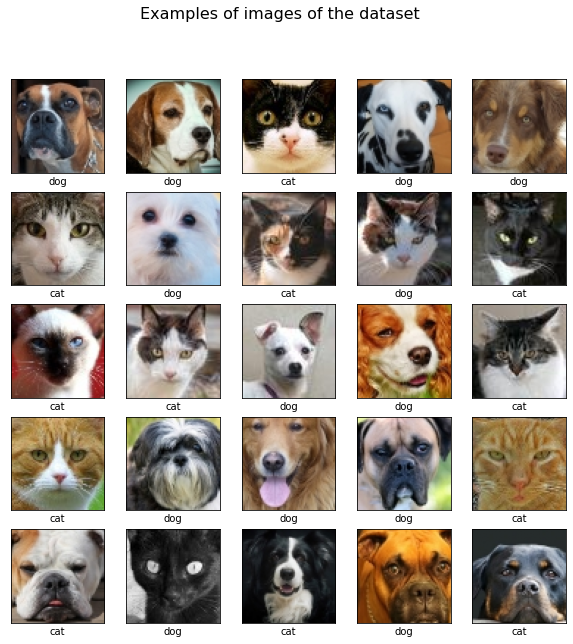

In [254]:
preview_examples(class_names,X_test,pred_labels)

In [255]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_labels)

In [256]:
cm

array([[11,  3],
       [ 4, 15]])

In [257]:
cm.diagonal()

array([11, 15])

In [258]:
cntY = 0
cntN = 0
for i in zip(pred_labels,y_test):
    if(i[0]==i[1]):
       cntY+=1
    else:
       cntN+=1
print(cntY,cntN)

26 7


In [259]:
cntY/(cntY+cntN)

0.7878787878787878